In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
from matplotlib import style
style.use('ggplot')

%matplotlib inline


In [2]:
dataset = pd.read_csv('train.csv')
dataset.head()

,Image_Size_(KBs),Total_RAM_(GBs),TOTAL_CPU_core,TOTAL_CPU_clock_speed_(GHz),RAM_usage_(GBs),Peak_RAM_usage,CPU_Usage_(percentage),DISK_I/O_read_count,DISK_I/O_write_count,DISK_I/O_read_bytes,DISK_I/O_write_bytes,DISK_I/O_read_chars,DISK_I/O_write_chars,Total_time_for_prediction_the_image_(Seconds)
0,9.016,7.689369,8,14.4,0.426048,673164,20.8183,52,0,5832704,0,196020,0,1.707282
1,6.148,7.689369,8,14.4,0.444836,673164,20.8125,16,0,0,0,11253,0,1.195691
2,17.807,7.689369,8,14.4,0.461895,673164,20.8027,16,0,0,0,22912,0,1.205350
3,16.144,7.689369,8,14.4,0.462868,673164,20.7924,16,0,0,0,21249,0,1.224532
4,10.577,7.689369,8,14.4,0.463234,673164,20.7819,16,0,0,0,15682,0,1.218947


In [3]:
dataset.isnull().any()

Image_Size_(KBs)                                 False
Total_RAM_(GBs)                                  False
TOTAL_CPU_core                                   False
TOTAL_CPU_clock_speed_(GHz)                      False
RAM_usage_(GBs)                                  False
Peak_RAM_usage                                   False
CPU_Usage_(percentage)                           False
DISK_I/O_read_count                              False
DISK_I/O_write_count                             False
DISK_I/O_read_bytes                              False
DISK_I/O_write_bytes                             False
DISK_I/O_read_chars                              False
DISK_I/O_write_chars                             False
Total_time_for_prediction_the_image_(Seconds)    False
dtype: bool

In [4]:
dataset = dataset.fillna(method='ffill')

In [5]:
X = dataset[['Image_Size_(KBs)', 'TOTAL_CPU_core', 'TOTAL_CPU_clock_speed_(GHz)', 'Total_RAM_(GBs)','RAM_usage_(GBs)', 'Peak_RAM_usage', 'DISK_I/O_read_count', 'DISK_I/O_write_count']].values

y = dataset['CPU_Usage_(percentage)'].values

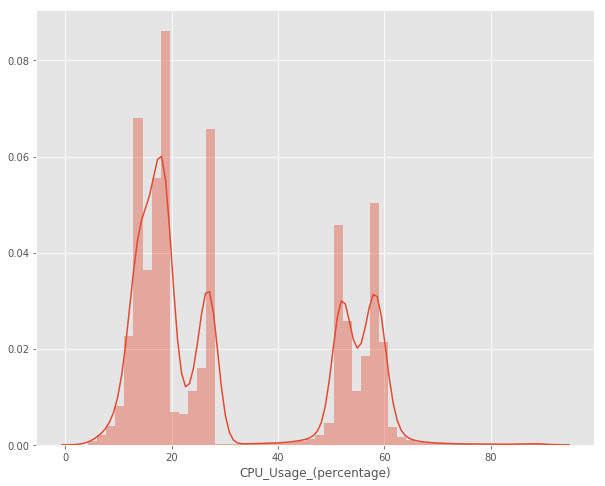

In [6]:
plt.figure(figsize=(10,8))
plt.tight_layout()
seabornInstance.distplot(dataset['CPU_Usage_(percentage)'])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

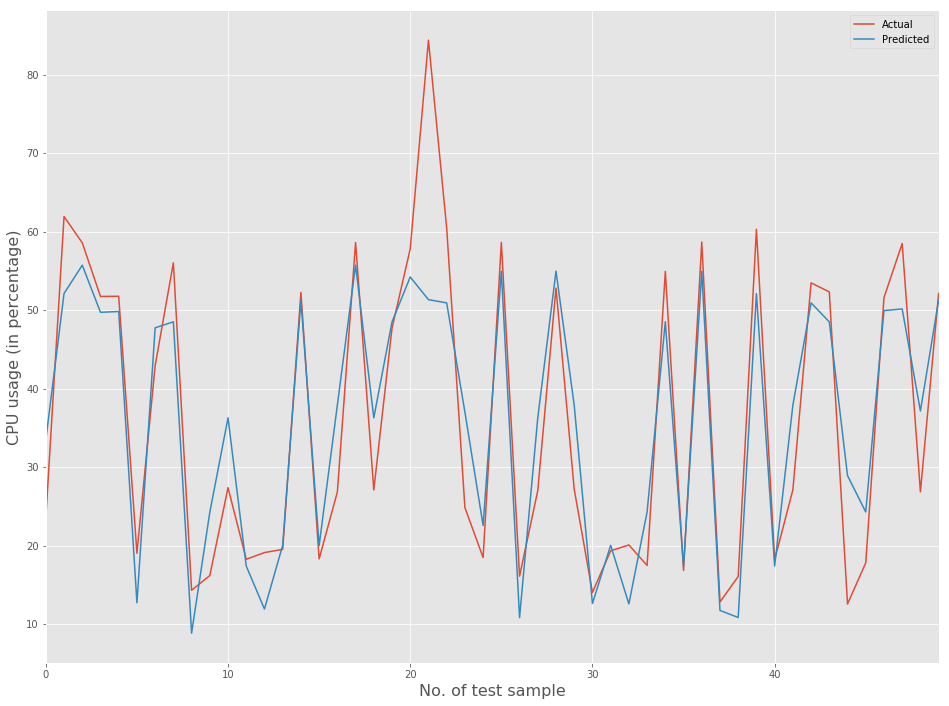

In [8]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(50)
df1.plot(kind='line',figsize=(16,12), fontsize=10)
plt.xlabel('No. of test sample', fontsize=16)
plt.ylabel('CPU usage (in percentage)', fontsize=16)
plt.show()

In [9]:
print('Mean Absolute Error for CPU usage:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error for CPU usage:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error for CPU usage:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error for CPU usage: 4.999319536123023
Mean Squared Error for CPU usage: 39.583605514127115
Root Mean Squared Error for CPU usage: 6.291550326757874


In [10]:
X1 = dataset[['Image_Size_(KBs)', 'TOTAL_CPU_core', 'TOTAL_CPU_clock_speed_(GHz)', 'Total_RAM_(GBs)','CPU_Usage_(percentage)', 'DISK_I/O_read_count', 'DISK_I/O_write_count']].values

y1 = dataset['RAM_usage_(GBs)'].values

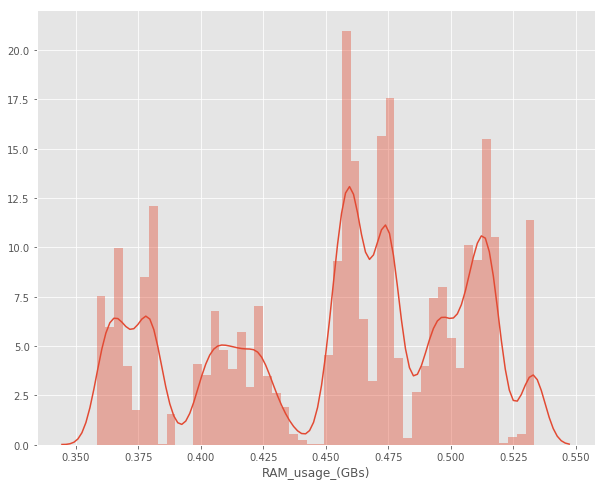

In [11]:
plt.figure(figsize=(10,8))
plt.tight_layout()
seabornInstance.distplot(dataset['RAM_usage_(GBs)'])

In [12]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

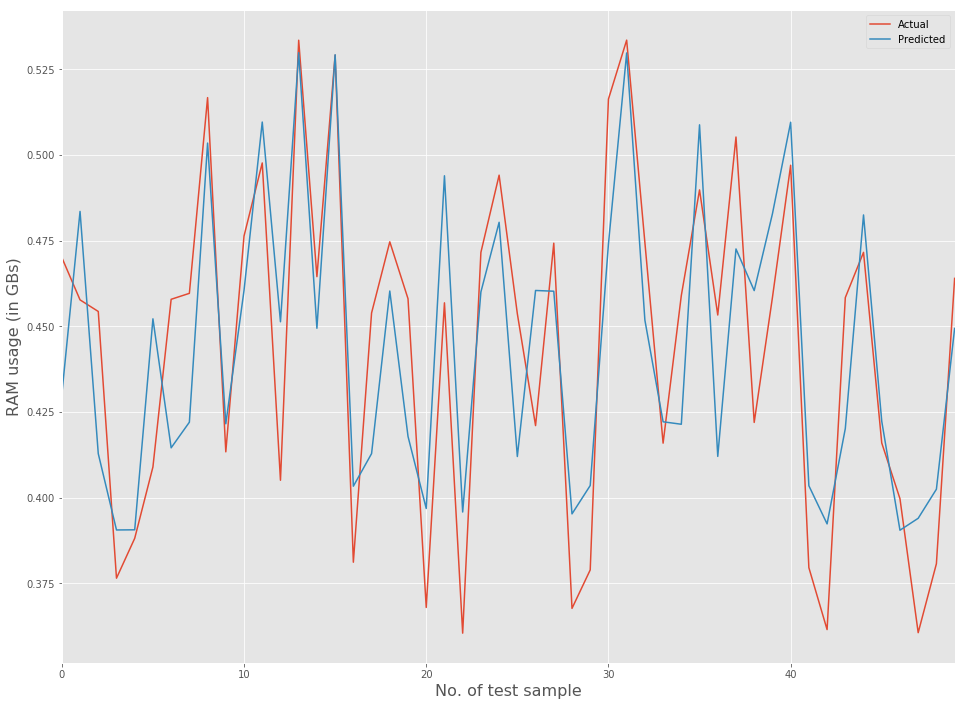

In [13]:
y1_pred = regressor.predict(X1_test)
df1 = pd.DataFrame({'Actual': y1_test, 'Predicted': y1_pred})
df11 = df1.head(50)
df11.plot(kind='line',figsize=(16,12), fontsize=10)
plt.xlabel('No. of test sample', fontsize=16)
plt.ylabel('RAM usage (in GBs)', fontsize=16)
plt.show()

In [14]:
print('Mean Absolute Error for RAM usage:', metrics.mean_absolute_error(y1_test, y1_pred))  
print('Mean Squared Error for RAM usage:', metrics.mean_squared_error(y1_test, y1_pred))  
print('Root Mean Squared Error for RAM usage:', np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))

Mean Absolute Error for RAM usage: 0.023695514826658524
Mean Squared Error for RAM usage: 0.0007553443635240777
Root Mean Squared Error for RAM usage: 0.027483528949610488


In [15]:
X2 = dataset[['Image_Size_(KBs)', 'TOTAL_CPU_core', 'TOTAL_CPU_clock_speed_(GHz)', 'Total_RAM_(GBs)','RAM_usage_(GBs)', 'Peak_RAM_usage', 'CPU_Usage_(percentage)', 'DISK_I/O_read_count', 'DISK_I/O_write_count']].values

y2 = dataset['Total_time_for_prediction_the_image_(Seconds)'].values

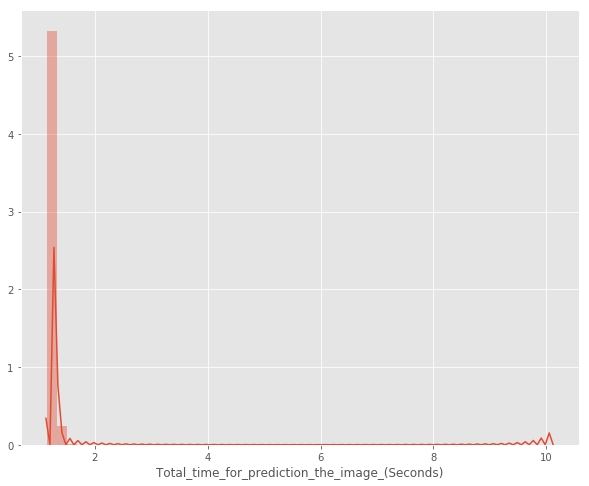

In [16]:
plt.figure(figsize=(10,8))
plt.tight_layout()
seabornInstance.distplot(dataset['Total_time_for_prediction_the_image_(Seconds)'])

In [17]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

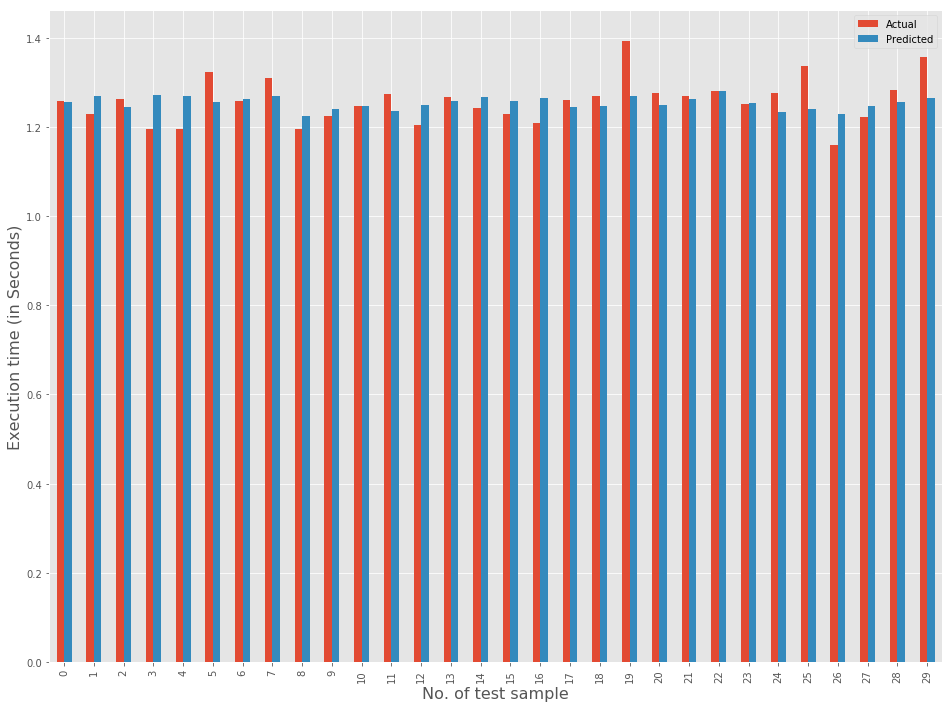

In [18]:
y2_pred = regressor.predict(X2_test)
df2 = pd.DataFrame({'Actual': y2_test, 'Predicted': y2_pred})
df22 = df2.head(30)
df22.plot(kind='bar',figsize=(16,12), fontsize=10)
plt.xlabel('No. of test sample', fontsize=16)
plt.ylabel('Execution time (in Seconds)', fontsize=16)
plt.show()

In [19]:
print('Mean Absolute Error for execution time:', metrics.mean_absolute_error(y2_test, y2_pred))  
print('Mean Squared Error for execution time:', metrics.mean_squared_error(y2_test, y2_pred))  
print('Root Mean Squared Error for execution time:', np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))

Mean Absolute Error for execution time: 0.03407517297556955
Mean Squared Error for execution time: 0.0032700131687553938
Root Mean Squared Error for execution time: 0.057184028965747015


In [20]:
data2 = dataset
data2.head()

,Image_Size_(KBs),Total_RAM_(GBs),TOTAL_CPU_core,TOTAL_CPU_clock_speed_(GHz),RAM_usage_(GBs),Peak_RAM_usage,CPU_Usage_(percentage),DISK_I/O_read_count,DISK_I/O_write_count,DISK_I/O_read_bytes,DISK_I/O_write_bytes,DISK_I/O_read_chars,DISK_I/O_write_chars,Total_time_for_prediction_the_image_(Seconds)
0,9.016,7.689369,8,14.4,0.426048,673164,20.8183,52,0,5832704,0,196020,0,1.707282
1,6.148,7.689369,8,14.4,0.444836,673164,20.8125,16,0,0,0,11253,0,1.195691
2,17.807,7.689369,8,14.4,0.461895,673164,20.8027,16,0,0,0,22912,0,1.205350
3,16.144,7.689369,8,14.4,0.462868,673164,20.7924,16,0,0,0,21249,0,1.224532
4,10.577,7.689369,8,14.4,0.463234,673164,20.7819,16,0,0,0,15682,0,1.218947


In [21]:
data2.drop(['DISK_I/O_write_chars', 'DISK_I/O_write_bytes','DISK_I/O_read_bytes','DISK_I/O_read_chars'], axis =1, inplace=True)

In [22]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

/root/.local/lib/python3.5/site-packages/pandas/compat/_optional.py:106: UserWarning: Pandas requires version '2.6.2' or newer of 'numexpr' (version '2.4.3' currently installed).
  warnings.warn(msg, UserWarning)


,Image_Size_(KBs),Total_RAM_(GBs),TOTAL_CPU_core,TOTAL_CPU_clock_speed_(GHz),RAM_usage_(GBs),Peak_RAM_usage,CPU_Usage_(percentage),DISK_I/O_read_count,DISK_I/O_write_count,Total_time_for_prediction_the_image_(Seconds)
0,-0.998097,1.406233,1.290399,-0.232233,-0.548327,-0.150574,-0.553952,2.180293,-0.848801,7.320251
1,-1.983507,1.406233,1.290399,-0.232233,-0.178516,-0.150574,-0.554272,-0.632687,-0.848801,-0.821103
2,2.022387,1.406233,1.290399,-0.232233,0.157280,-0.150574,-0.554814,-0.632687,-0.848801,-0.667390
3,1.451000,1.406233,1.290399,-0.232233,0.176427,-0.150574,-0.555384,-0.632687,-0.848801,-0.362131
4,-0.461755,1.406233,1.290399,-0.232233,0.183636,-0.150574,-0.555964,-0.632687,-0.848801,-0.451004


In [23]:
def gradientDescent(X3, y3, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X3 * theta.T) - y3
        
        for j in range(parameters):
            term = np.multiply(error, X3[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X3)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X3, y3, theta)
        
    return theta, cost

In [24]:
def computeCost(X3, y3, theta):
    inner = np.power(((X3 * theta.T) - y3), 2)
    return np.sum(inner) / (2 * len(X3))

In [25]:
alpha = 0.01
iters = 100

# add ones column
data2.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data2.shape[1]
X33 = data2.iloc[:,0:cols-1]
y33 = data2.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X33 = np.matrix(X33.values)
y33 = np.matrix(y33.values)

theta2 = np.matrix(np.array([0,0,0,0,0,0,0,0,0,0]))

# perform linear regression on the data set
g2, cost2 = gradientDescent(X33, y33, theta2, alpha, iters)

# get the cost (error) of the model
computeCost(X33, y33, g2)

0.46728059430727875

Text(0.5,1,'Error vs. Training Iterations: Execution time')

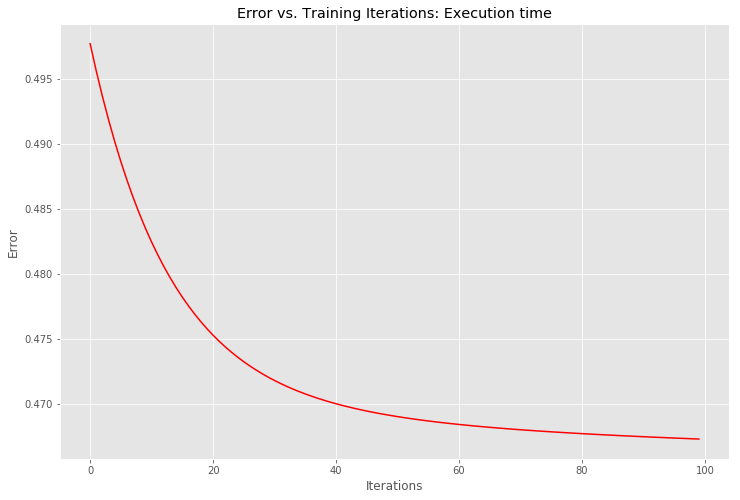

In [26]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Error')
ax.set_title('Error vs. Training Iterations: Execution time')

In [27]:
data3 = pd.read_csv('train1.csv')
data3.drop(['Peak_RAM_usage','DISK_I/O_write_chars','DISK_I/O_write_bytes','DISK_I/O_read_bytes','DISK_I/O_read_chars','Total_time_for_prediction_the_image_(Seconds)'], axis =1, inplace=True)
data3.head()

,Image_Size_(KBs),Total_RAM_(GBs),TOTAL_CPU_core,TOTAL_CPU_clock_speed_(GHz),CPU_Usage_(percentage),DISK_I/O_read_count,DISK_I/O_write_count,RAM_usage_(GBs)
0,9.016,7.689369,8,14.4,20.8183,52,0,0.426048
1,6.148,7.689369,8,14.4,20.8125,16,0,0.444836
2,17.807,7.689369,8,14.4,20.8027,16,0,0.461895
3,16.144,7.689369,8,14.4,20.7924,16,0,0.462868
4,10.577,7.689369,8,14.4,20.7819,16,0,0.463234


In [28]:
data3.drop(['DISK_I/O_write_count'], axis =1, inplace=True)
data3 = (data3 - data3.mean()) / data3.std()
data3.head()

,Image_Size_(KBs),Total_RAM_(GBs),TOTAL_CPU_core,TOTAL_CPU_clock_speed_(GHz),CPU_Usage_(percentage),DISK_I/O_read_count,RAM_usage_(GBs)
0,-0.998097,1.406233,1.290399,-0.232233,-0.553952,2.180293,-0.548327
1,-1.983507,1.406233,1.290399,-0.232233,-0.554272,-0.632687,-0.178516
2,2.022387,1.406233,1.290399,-0.232233,-0.554814,-0.632687,0.157280
3,1.451000,1.406233,1.290399,-0.232233,-0.555384,-0.632687,0.176427
4,-0.461755,1.406233,1.290399,-0.232233,-0.555964,-0.632687,0.183636


In [29]:
def gradientDescent(X4, y4, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X4 * theta.T) - y4
        
        for j in range(parameters):
            term = np.multiply(error, X4[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X4)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X4, y4, theta)
        
    return theta, cost

In [30]:
def computeCost(X4, y4, theta):
    inner = np.power(((X4 * theta.T) - y4), 2)
    return np.sum(inner) / (2 * len(X4))

In [31]:
alpha = 0.01
iters = 100

# add ones column
data3.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data3.shape[1]
X44 = data3.iloc[:,0:cols-1]
y44 = data3.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X44 = np.matrix(X44.values)
y44 = np.matrix(y44.values)

theta3 = np.matrix(np.array([0,0,0,0,0,0,0]))

# perform linear regression on the data set
g3, cost3 = gradientDescent(X44, y44, theta3, alpha, iters)

# get the cost (error) of the model
computeCost(X44, y44, g3)

0.18443433877603438

Text(0.5,1,'Error vs. Training Iterations: RAM usage')

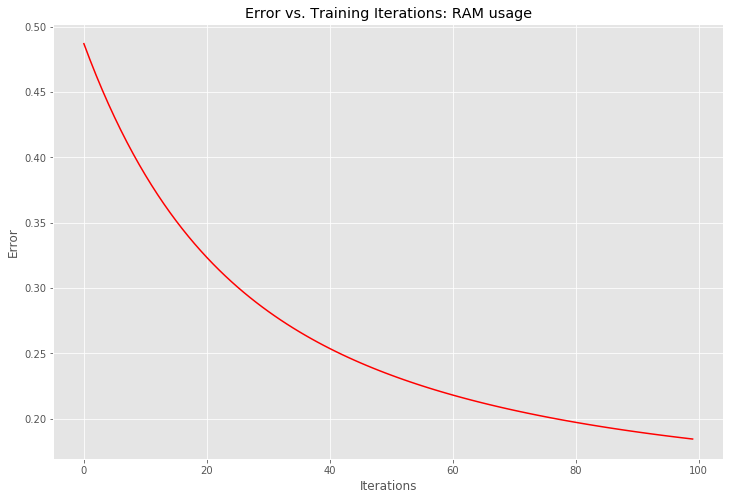

In [32]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost3, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Error')
ax.set_title('Error vs. Training Iterations: RAM usage')

In [33]:
data4 = pd.read_csv('train2.csv')
data4.drop(['DISK_I/O_write_chars','DISK_I/O_write_bytes','DISK_I/O_read_bytes','DISK_I/O_read_chars','Total_time_for_prediction_the_image_(Seconds)'], axis =1, inplace=True)
data4.head()

,Image_Size_(KBs),Total_RAM_(GBs),TOTAL_CPU_core,TOTAL_CPU_clock_speed_(GHz),Peak_RAM_usage,DISK_I/O_read_count,DISK_I/O_write_count,RAM_usage_(GBs),CPU_Usage_(percentage)
0,9.016,7.689369,8,14.4,673164,52,0,0.426048,20.8183
1,6.148,7.689369,8,14.4,673164,16,0,0.444836,20.8125
2,17.807,7.689369,8,14.4,673164,16,0,0.461895,20.8027
3,16.144,7.689369,8,14.4,673164,16,0,0.462868,20.7924
4,10.577,7.689369,8,14.4,673164,16,0,0.463234,20.7819


In [34]:
data4.drop(['DISK_I/O_write_count'], axis =1, inplace=True)
data4 = (data4 - data4.mean()) / data4.std()
data4.head()

,Image_Size_(KBs),Total_RAM_(GBs),TOTAL_CPU_core,TOTAL_CPU_clock_speed_(GHz),Peak_RAM_usage,DISK_I/O_read_count,RAM_usage_(GBs),CPU_Usage_(percentage)
0,-0.998097,1.406233,1.290399,-0.232233,-0.150574,2.180293,-0.548327,-0.553952
1,-1.983507,1.406233,1.290399,-0.232233,-0.150574,-0.632687,-0.178516,-0.554272
2,2.022387,1.406233,1.290399,-0.232233,-0.150574,-0.632687,0.157280,-0.554814
3,1.451000,1.406233,1.290399,-0.232233,-0.150574,-0.632687,0.176427,-0.555384
4,-0.461755,1.406233,1.290399,-0.232233,-0.150574,-0.632687,0.183636,-0.555964


In [35]:
def gradientDescent(X5, y5, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X5 * theta.T) - y5
        
        for j in range(parameters):
            term = np.multiply(error, X5[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X5)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X5, y5, theta)
        
    return theta, cost

In [36]:
def computeCost(X5, y5, theta):
    inner = np.power(((X5 * theta.T) - y5), 2)
    return np.sum(inner) / (2 * len(X5))

In [37]:
alpha = 0.01
iters = 100

# add ones column
data4.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data4.shape[1]
X55 = data4.iloc[:,0:cols-1]
y55 = data4.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X55 = np.matrix(X55.values)
y55 = np.matrix(y55.values)

theta4 = np.matrix(np.array([0,0,0,0,0,0,0,0]))

# perform linear regression on the data set
g4, cost4 = gradientDescent(X55, y55, theta4, alpha, iters)

# get the cost (error) of the model
computeCost(X55, y55, g4)

0.07698763810078611

Text(0.5,1,'Error vs. Training Iterations: CPU usage')

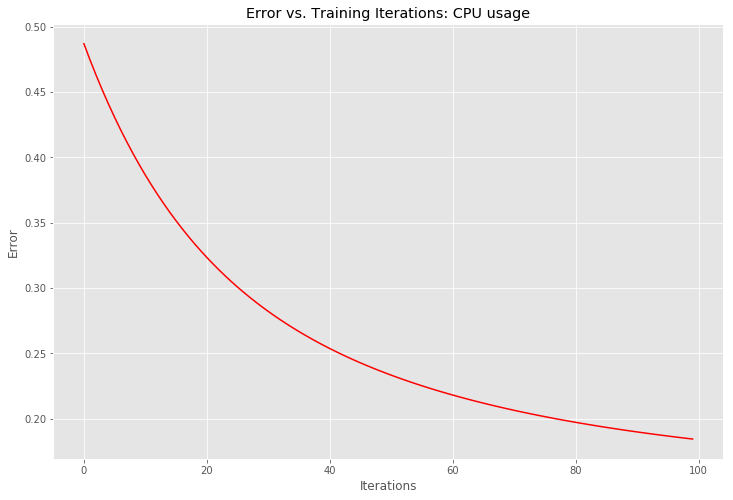

In [38]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost3, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Error')
ax.set_title('Error vs. Training Iterations: CPU usage')